In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [3]:
df=pd.read_csv('Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [4]:
df.shape

(571, 43)

This dataset has 571 rows and 43 columns, out of which CGPA column is the target variable.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [6]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [7]:
df.isnull().sum().sum()

425

We can see that there are 425 null values in the dataset.

<Axes: >

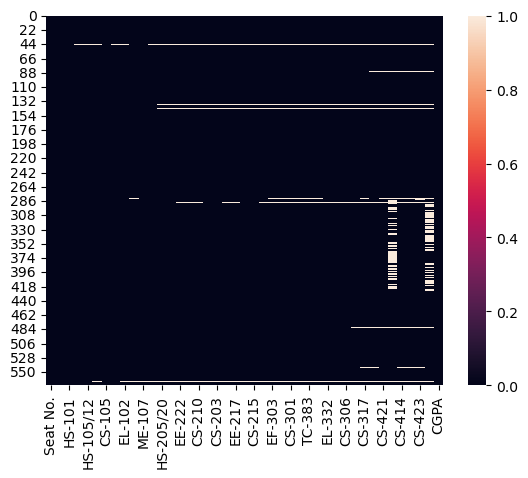

In [8]:
sns.heatmap(df.isnull())

Replacing the null values with 0 in the dataset

In [10]:
df.replace(np.nan,0, inplace = True)
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


Finding the unique values in the columns

In [12]:
pd.unique(df["PH-121"])

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

Converting the Alphabetical grades into numbers (Feature Encoding)

In [15]:
grades_enc = {'B-':2.7, 'A':4, 'D':1.0, 'A-':3.7, 'B+':3.4, 'B':3.0, 'C+':2.4, 'C':2.0, 'C-':1.7, 'D+':1.4, 'WU':0.0, 'A+':4,'F':0.0,'W':0,'I':0}

In [18]:
df_g=df.drop('CGPA',axis=1)
for i in df_g:
      df_g[i] = df_g[i].replace(grades_enc)
df_g

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0,5,10,1.7,2.0,1.7,1.4,1.0,1.7,2.7,...,2.0,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7
1,1,0,9,1.4,1.0,2.7,2.0,1.0,4.0,1.4,...,1.0,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0
2,2,0,3,4.0,2.7,3.4,4.0,2.7,3.4,3.7,...,3.7,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0
3,3,9,7,1.4,1.0,1.0,3.7,1.4,1.7,1.0,...,1.7,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4
4,4,2,2,3.7,3.4,4.0,4.0,3.7,3.4,4.0,...,3.7,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,3,0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,...,3.4,3.7,3.7,4.0,4.0,4.0,3.4,3.4,3.0,4.0
567,567,1,0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,...,3.7,3.4,3.4,4.0,4.0,3.7,3.0,3.7,2.0,3.7
568,568,3,0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,...,3.4,3.7,3.0,4.0,3.4,4.0,2.0,3.4,3.7,3.7
569,569,0,4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,...,3.4,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0


In [22]:
y=df[['CGPA']]
df1=pd.concat([df_g,y],axis=1)

In [23]:
df1

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,5,10,1.7,2.0,1.7,1.4,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,1,0,9,1.4,1.0,2.7,2.0,1.0,4.0,1.4,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,2,0,3,4.0,2.7,3.4,4.0,2.7,3.4,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,3,9,7,1.4,1.0,1.0,3.7,1.4,1.7,1.0,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,4,2,2,3.7,3.4,4.0,4.0,3.7,3.4,4.0,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,3,0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,...,3.7,3.7,4.0,4.0,4.0,3.4,3.4,3.0,4.0,3.798
567,567,1,0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,...,3.4,3.4,4.0,4.0,3.7,3.0,3.7,2.0,3.7,3.772
568,568,3,0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,...,3.7,3.0,4.0,3.4,4.0,2.0,3.4,3.7,3.7,3.470
569,569,0,4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,...,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0,2.193


In [25]:
df1.describe()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,285.000000,3.781086,5.071804,3.262697,2.878984,2.988091,3.329247,2.961996,2.969877,3.020140,...,2.892294,2.651138,3.068827,2.450963,2.772154,3.349737,2.963573,2.906305,2.794221,2.954888
std,164.977776,3.046895,2.785317,0.932997,1.019208,0.954343,0.799826,0.869226,0.981676,0.839463,...,1.095450,0.952455,0.955983,0.973947,1.393964,0.918549,0.861763,0.987516,1.338912,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,142.500000,2.000000,3.000000,2.700000,2.000000,2.400000,3.000000,2.400000,2.400000,2.400000,...,2.000000,2.000000,2.400000,1.700000,2.400000,3.000000,2.700000,2.400000,2.400000,2.538000
50%,285.000000,3.000000,5.000000,3.700000,3.000000,3.400000,3.700000,3.000000,3.400000,3.400000,...,3.000000,2.700000,3.400000,2.700000,3.400000,3.700000,3.000000,3.000000,3.400000,3.029000
75%,427.500000,6.000000,7.000000,4.000000,3.700000,3.700000,4.000000,3.700000,3.700000,3.700000,...,4.000000,3.400000,4.000000,3.000000,3.700000,4.000000,3.700000,3.700000,3.700000,3.451000
max,570.000000,12.000000,11.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000


df.describe() gives statistical summary for the numerical columns. There are no negative values present in the statistical summary.

From the above statistical summary, we can observe the following:
1. Using the describe method We can see the count, mean, standard deviation, minimum, maximum and inter quantile values of our dataset.
2. The counts of all the columns are the same which means there are no missing values in the dataset.
3. The mean value is almost equal to the median (50%) value in most of the columns which means data is normally skewed for most of the columns.

## Data Visualization

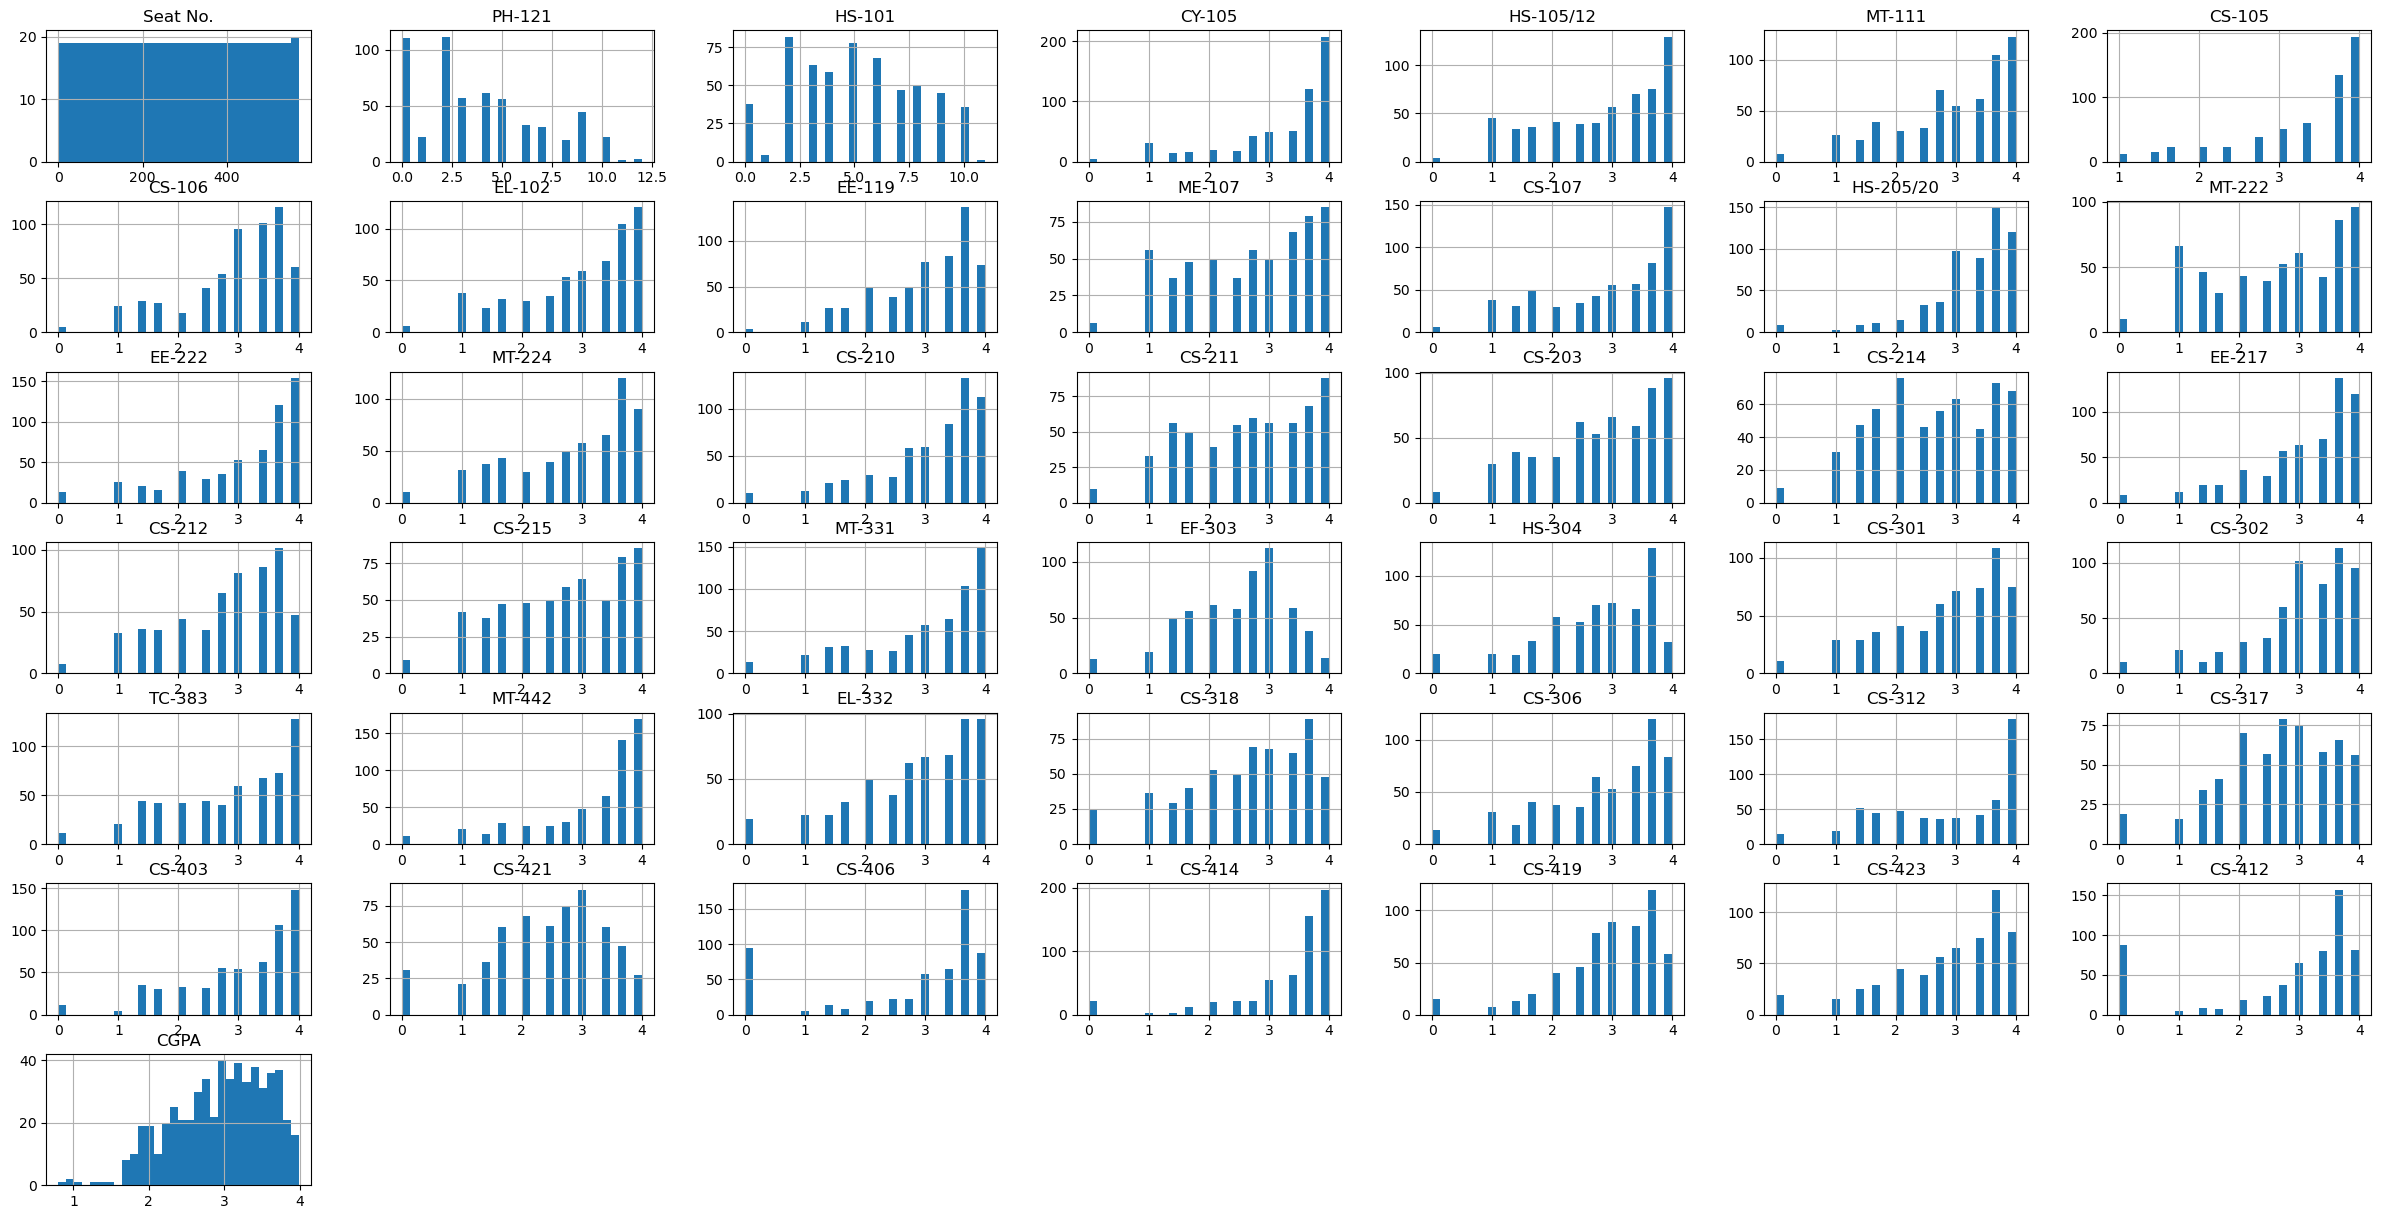

In [26]:
df1.hist(bins=30,figsize=(30,15))
plt.show()

Checking correlation

<Axes: >

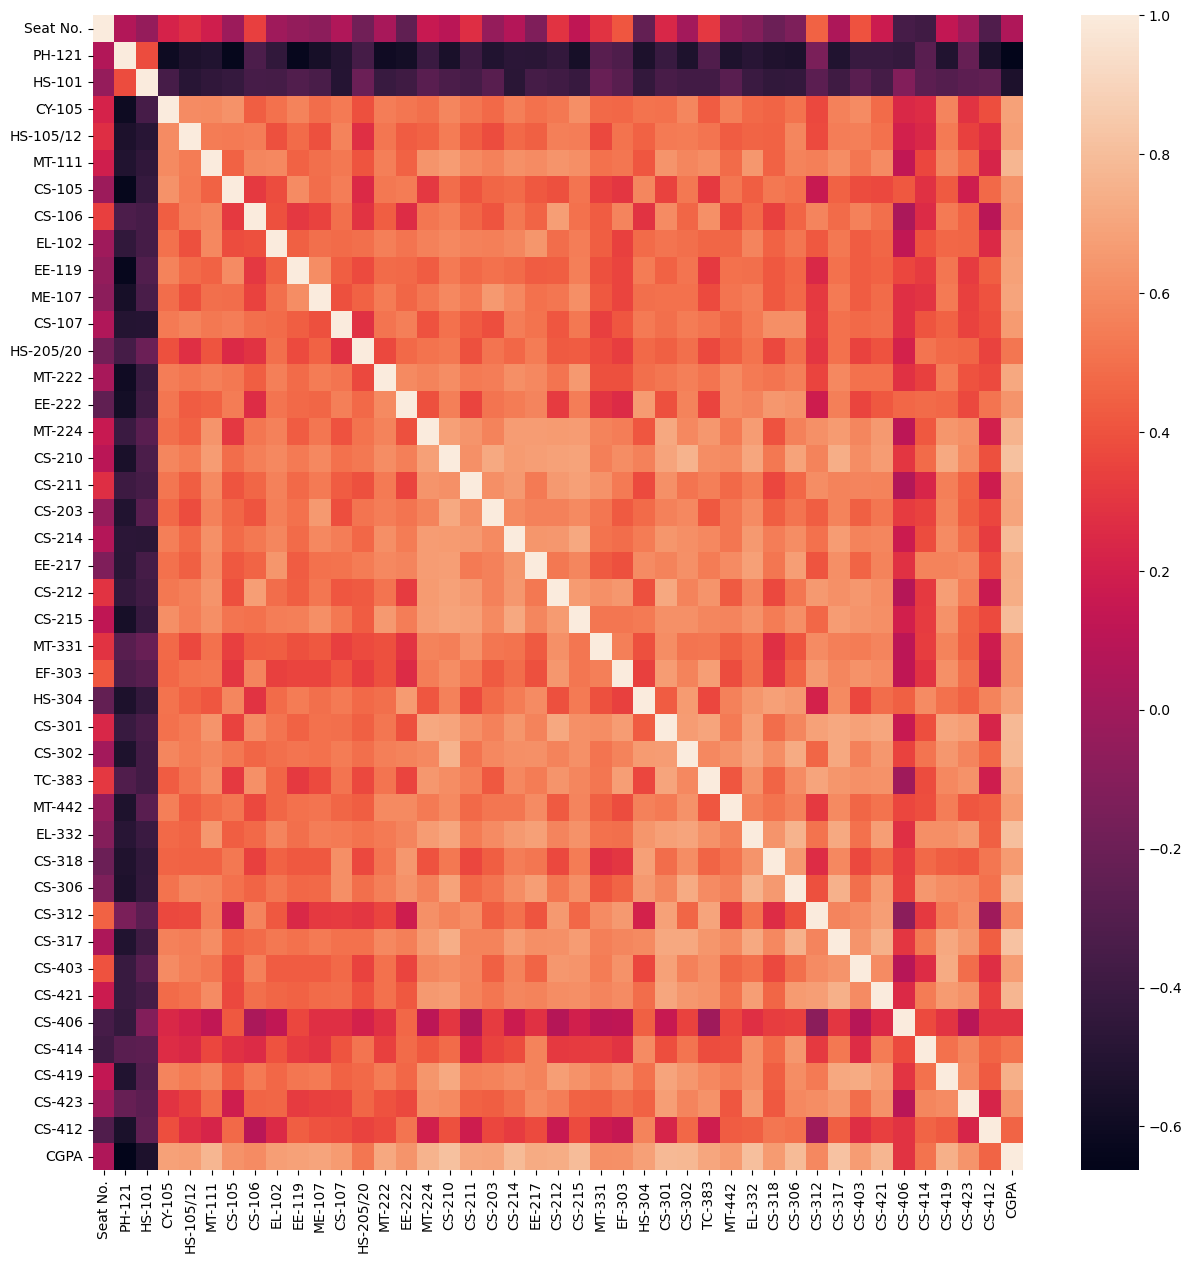

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr())

We can see that the columns 'PH-121','HS-101' are highly negatively correlated with the CGPA column. Hence, they can be removed.

In [32]:
df1=df1.drop(['PH-121','HS-101'],axis=1)

In [33]:
df1.duplicated().sum()

0

We can see that there are no duplicate values in the dataset.

<Axes: xlabel='CGPA', ylabel='Density'>

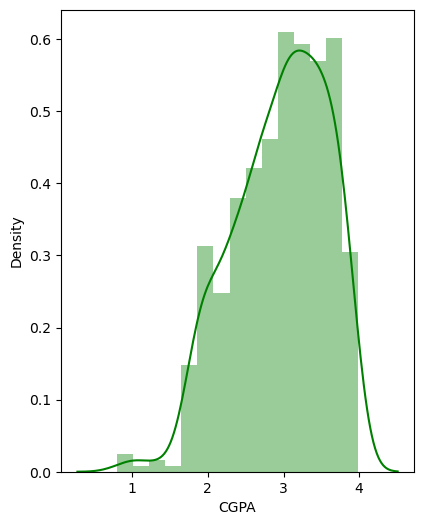

In [34]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.distplot(df['CGPA'], color = 'g')

We can see from the above visualization, it's normally skewed.

## Removing Outliers

In [37]:
z=np.abs(zscore(df1))
threshold=3
np.where(z>3)
df1=df1[(z<3).all(axis=1)]
df1

,Seat No.,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,1,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,3.4,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,2,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,2.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,3,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,1.0,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,4,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,2.0,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,4.0,...,3.7,3.7,4.0,4.0,4.0,3.4,3.4,3.0,4.0,3.798
567,567,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,4.0,...,3.4,3.4,4.0,4.0,3.7,3.0,3.7,2.0,3.7,3.772
568,568,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,4.0,...,3.7,3.0,4.0,3.4,4.0,2.0,3.4,3.7,3.7,3.470
569,569,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,4.0,...,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0,2.193


We removed outliers using zscore. Now the dataset has been reduced to 542 rows and 41 columns.

In [38]:
df1.shape

(542, 41)

<Axes: >

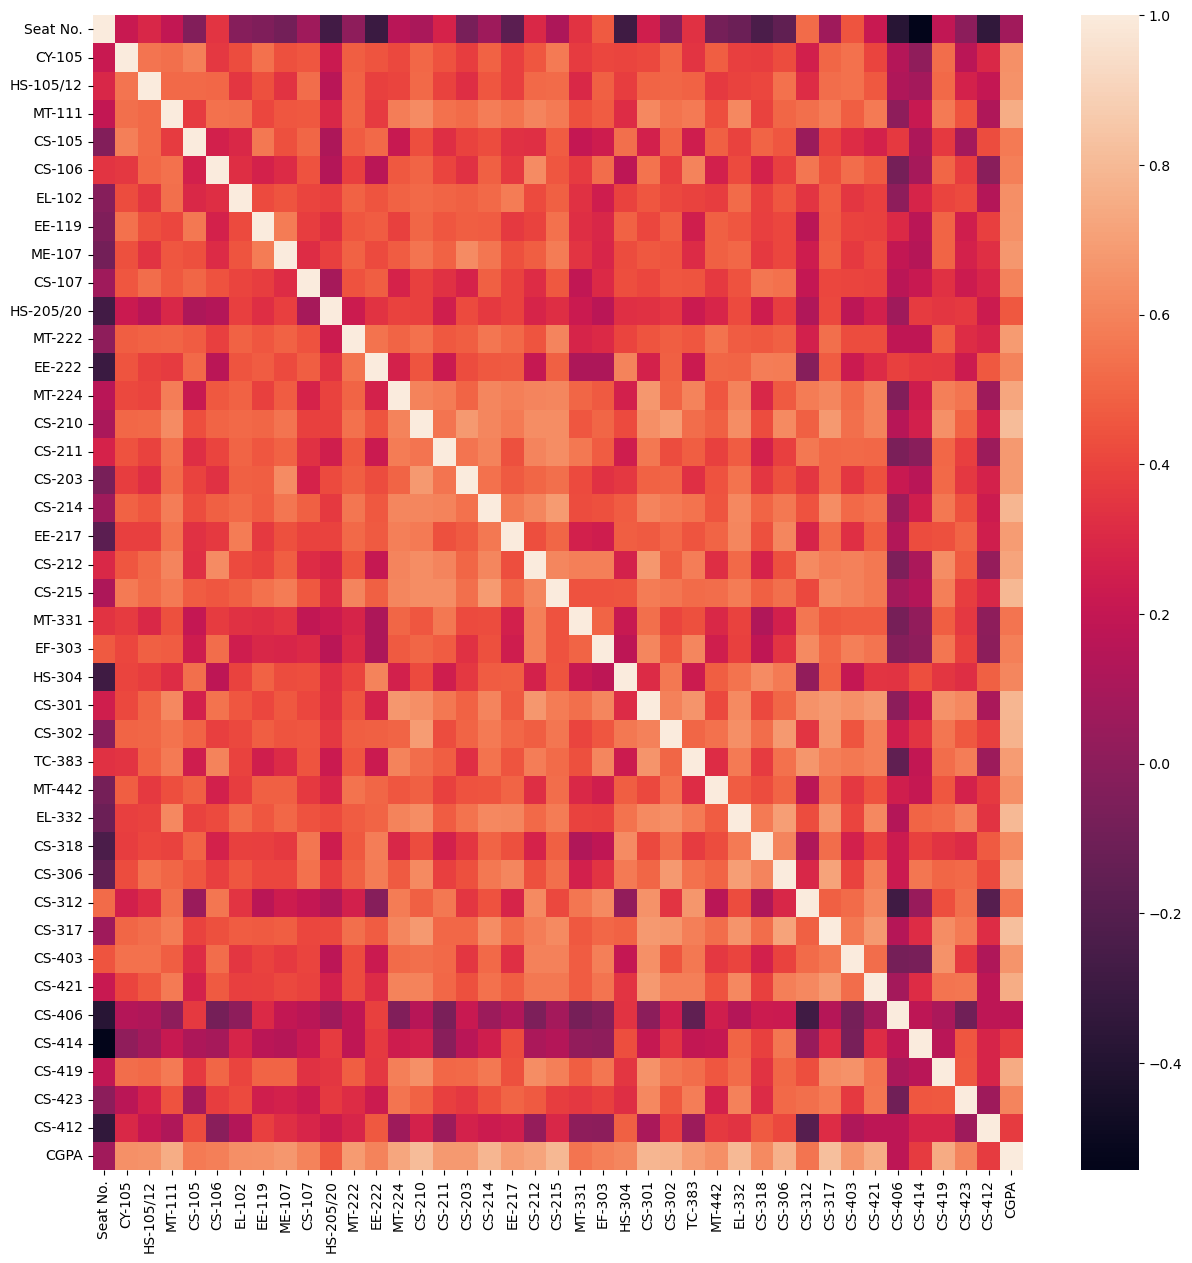

In [39]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr())

Splitting the dataset into independent variables and dependent variables

In [42]:
x=df1.drop(['CGPA'],axis=1)
y=df1['CGPA']

Finding the best random state

In [43]:
#finding the best random state
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score: ",maxAccu," on random state ",maxRS)

Maximum r2 score:  0.9971515003268457  on random state  13


Splitting the Dataset into training data and testing data

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=13)

Linear Regression

In [45]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
predtrain=lr.predict(x_train)
print(lr)
print('R2 Score: ',r2_score(y_test,predlr))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,predlr))
print('Mean Squared Error: ',mean_squared_error(y_test,predlr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predlr)))

LinearRegression()
R2 Score:  0.9971515003268457
R2 Score on training data:  0.9953000128047741
Mean Absolute Error:  0.02569729823705972
Mean Squared Error:  0.0010317630268763332
Root Mean Squared Error:  0.0321210682710948


Random Forest Regressor

In [46]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predrfr=rfr.predict(x_test)
predtrain=rfr.predict(x_train)
print(rfr)
print('R2 Score: ',r2_score(y_test,predrfr))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,predrfr))
print('Mean Squared Error: ',mean_squared_error(y_test,predrfr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predrfr)))

RandomForestRegressor()
R2 Score:  0.9627406265236235
R2 Score on training data:  0.9932646984808189
Mean Absolute Error:  0.08203458715596319
Mean Squared Error:  0.013495821789908248
Root Mean Squared Error:  0.11617151884135908


Decision Tree Regressor

In [47]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
predtrain=dtr.predict(x_train)
print(dtr)
print('R2 Score: ',r2_score(y_test,preddtr))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,preddtr))
print('Mean Squared Error: ',mean_squared_error(y_test,preddtr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,preddtr)))

DecisionTreeRegressor()
R2 Score:  0.8110993075432378
R2 Score on training data:  1.0
Mean Absolute Error:  0.2018256880733945
Mean Squared Error:  0.06842224770642202
Root Mean Squared Error:  0.2615764662702324


KNeigbour Regressor

In [48]:
knn=KNN()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
predtrain=knn.predict(x_train)
print(knn)
print('R2 Score: ',r2_score(y_test,predknn))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,predknn))
print('Mean Squared Error: ',mean_squared_error(y_test,predknn))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predknn)))

KNeighborsRegressor()
R2 Score:  0.7009458341376066
R2 Score on training data:  0.7956757297268758
Mean Absolute Error:  0.2725376146788991
Mean Squared Error:  0.10832124513761471
Root Mean Squared Error:  0.3291219305023819


Lasso

In [49]:
l=Lasso()
l.fit(x_train,y_train)
predl=l.predict(x_test)
predtrain=l.predict(x_train)
print(l)
print('R2 Score: ',r2_score(y_test,predl))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,predl))
print('Mean Squared Error: ',mean_squared_error(y_test,predl))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predl)))

Lasso()
R2 Score:  -0.010909202392275219
R2 Score on training data:  0.006161387097493032
Mean Absolute Error:  0.5183877105056123
Mean Squared Error:  0.3661642472306867
Root Mean Squared Error:  0.6051150694129892


Ridge

In [50]:
r=Ridge()
r.fit(x_train,y_train)
predr=r.predict(x_test)
predtrain=r.predict(x_train)
print(r)
print('R2 Score: ',r2_score(y_test,predr))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,predr))
print('Mean Squared Error: ',mean_squared_error(y_test,predr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predr)))

Ridge()
R2 Score:  0.9971499076090768
R2 Score on training data:  0.9952998670181811
Mean Absolute Error:  0.025718317126432046
Mean Squared Error:  0.0010323399296303384
Root Mean Squared Error:  0.03213004714640703


Support Vector Regressor

In [61]:
svr=SVR()
svr.fit(x_train,y_train)
preds=svr.predict(x_test)
predtrain=svr.predict(x_train)
print(svr)
print('R2 Score: ',r2_score(y_test,preds))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,preds))
print('Mean Squared Error: ',mean_squared_error(y_test,preds))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,preds)))

SVR()
R2 Score:  0.189393670848643
R2 Score on training data:  0.20083704235807065
Mean Absolute Error:  0.4621705869292485
Mean Squared Error:  0.29361198375851777
Root Mean Squared Error:  0.541859745467882


Gradient Boosting Regressor

In [53]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
predtrain=gbr.predict(x_train)
print(gbr)
print('R2 Score: ',r2_score(y_test,predgbr))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,predgbr))
print('Mean Squared Error: ',mean_squared_error(y_test,predgbr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predgbr)))

GradientBoostingRegressor()
R2 Score:  0.9717113868767749
R2 Score on training data:  0.9976447095518161
Mean Absolute Error:  0.07161593274463877
Mean Squared Error:  0.010246497613191557
Root Mean Squared Error:  0.10122498512319751


Cross Validation Scores:

In [54]:
s=cross_val_score(lr,x,y)
print(s)
print(s.mean())
print('Difference between R2 score and cross validation score: ',r2_score(y_test,predlr)-s.mean())

[0.99389297 0.99660334 0.98990112 0.99183176 0.99318157]
0.9930821517421501
Difference between R2 score and cross validation score:  0.004069348584695653


In [55]:
s1=cross_val_score(rfr,x,y)
print(s1)
print(s1.mean())
print('Difference between R2 score and cross validation score: ',r2_score(y_test,predrfr)-s1.mean())

[0.96320607 0.94449214 0.95225974 0.94267874 0.92217815]
0.9449629695229664
Difference between R2 score and cross validation score:  0.017777657000657032


In [56]:
s2=cross_val_score(dtr,x,y)
print(s2)
print(s2.mean())
print('Difference between R2 score and cross validation score: ',r2_score(y_test,preddtr)-s2.mean())

[0.83129643 0.84901842 0.86596959 0.7795328  0.84768181]
0.8346998101977834
Difference between R2 score and cross validation score:  -0.023600502654545608


In [57]:
s3=cross_val_score(knn,x,y)
print(s3)
print(s3.mean())
print('Difference between R2 score and cross validation score: ',r2_score(y_test,predknn)-s3.mean())

[-0.32666972  0.17132698 -0.09143633 -0.03971993  0.06252688]
-0.04479442265592541
Difference between R2 score and cross validation score:  0.745740256793532


In [58]:
s4=cross_val_score(l,x,y)
print(s4)
print(s4.mean())
print('Difference between R2 score and cross validation score: ',r2_score(y_test,predl)-s4.mean())

[-0.00547675 -0.00376621 -0.00721608 -0.00681432 -0.00579641]
-0.005813954634985308
Difference between R2 score and cross validation score:  -0.005095247757289911


In [59]:
s5=cross_val_score(r,x,y)
print(s5)
print(s5.mean())
print('Difference between R2 score and cross validation score: ',r2_score(y_test,predr)-s5.mean())

[0.99394598 0.99661628 0.98991301 0.99182746 0.99323465]
0.9931074774287028
Difference between R2 score and cross validation score:  0.00404243018037409


In [62]:
s6=cross_val_score(svr,x,y)
print(s6)
print(s6.mean())
print('Difference between R2 score and cross validation score: ',r2_score(y_test,preds)-s6.mean())

[0.09764843 0.16959575 0.16002291 0.20260743 0.16434432]
0.1588437686896633
Difference between R2 score and cross validation score:  0.030549902158979708


In [63]:
s7=cross_val_score(gbr,x,y)
print(s7)
print(s7.mean())
print('Difference between R2 score and cross validation score: ',r2_score(y_test,predgbr)-s7.mean())

[0.95470292 0.96255314 0.96948279 0.95794826 0.9528804 ]
0.9595135038613296
Difference between R2 score and cross validation score:  0.012197883015445332


Ridge is chosen as it has the least difference.

Hyperparameter tuning:

In [66]:
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
param_grid = {
    'alpha': [0.1, 1, 10],  
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  
}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring='neg_mean_squared_error')

In [67]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'alpha': 10, 'solver': 'sag'}


In [68]:
ri=Ridge(alpha=10,solver='sag')
ri.fit(x_train,y_train)
predri=ri.predict(x_test)
predtrain=ri.predict(x_train)
print(ri)
print('R2 Score: ',r2_score(y_test,predri))
print('R2 Score on training data: ',r2_score(y_train,predtrain))
print('Mean Absolute Error: ',mean_absolute_error(y_test,predri))
print('Mean Squared Error: ',mean_squared_error(y_test,predri))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predri)))

Ridge(alpha=10, solver='sag')
R2 Score:  0.9969709576934763
R2 Score on training data:  0.9952091712307789
Mean Absolute Error:  0.026549897832534017
Mean Squared Error:  0.0010971578786437284
Root Mean Squared Error:  0.033123373599978134


In [69]:
final_model=ri
import joblib
filename = "GradesPred_Final.pkl"
joblib.dump(final_model, filename)

['GradesPred_Final.pkl']